## Import Libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Creating the Clusters

In [2]:
from sklearn.cluster import KMeans

# Clustering with Mall Data

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40
...,...,...,...
195,196,120,79
196,197,126,28
197,198,126,74
198,199,137,18


In [4]:
X= df.iloc[:, [1,2]].values

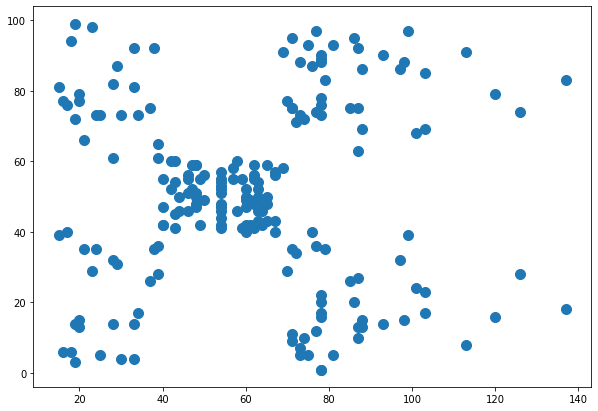

In [5]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], s = 100)

In [41]:
kmeans = KMeans(n_clusters=50)
kmeans.fit(X)

KMeans(n_clusters=50)

In [42]:
kmeans.cluster_centers_

array([[ 62.72727273,  41.72727273],
       [ 77.33333333,  89.16666667],
       [ 30.        ,  73.4       ],
       [100.5       ,  16.        ],
       [ 29.33333333,   4.33333333],
       [ 26.        ,  31.75      ],
       [ 78.        ,  18.75      ],
       [102.        ,  68.5       ],
       [ 54.        ,  52.16666667],
       [113.        ,  91.        ],
       [ 71.83333333,  73.83333333],
       [ 20.        ,  97.        ],
       [ 77.        ,   3.4       ],
       [ 46.7       ,  49.6       ],
       [126.        ,  28.        ],
       [ 40.6       ,  60.2       ],
       [ 64.625     ,  56.75      ],
       [ 86.66666667,  73.        ],
       [137.        ,  83.        ],
       [ 88.16666667,  14.16666667],
       [ 30.        ,  83.33333333],
       [ 97.75      ,  87.25      ],
       [ 17.83333333,  77.        ],
       [ 19.66666667,  14.        ],
       [ 74.16666667,  34.83333333],
       [ 38.5       ,  35.5       ],
       [ 98.        ,  35.5       ],
 

In [43]:
kmeans.labels_

array([27, 22, 49, 22, 27, 22, 49, 11, 49, 22, 23, 11, 23, 22, 23, 22, 27,
       40,  5, 11,  5,  2,  4,  2, 28, 20,  5, 40,  5, 20,  4,  2,  4, 45,
       28, 20, 28,  2, 36,  2, 25, 45, 25, 15, 36, 15, 15, 47, 47, 47, 13,
       15, 42, 15, 47, 47, 13, 47, 13, 13, 42, 42, 13, 42, 13, 42, 13, 13,
       42, 13, 42, 37, 13, 42, 37,  8,  8,  8,  8, 37,  8,  8, 37, 37, 29,
       37, 29, 29, 29, 33, 29,  0, 33,  0,  0, 33, 33, 33,  0, 33,  0, 33,
       16, 16, 16,  0, 33, 33,  0, 33, 33, 16,  0, 33, 33, 33,  0, 16,  0,
       16, 16,  0, 16, 32, 24, 10, 24, 32, 31, 10, 31, 10, 24, 10, 12,  1,
       31, 10, 31, 10, 12, 32, 24,  1, 31, 32, 24, 44,  6,  1,  6,  1,  6,
       44,  6,  1, 12, 44, 12, 44, 24, 44, 12,  1, 39, 17, 19, 34, 39, 41,
       19, 17, 19, 34, 19, 34, 19, 17, 19, 21, 26, 21,  3, 21, 26, 43, 48,
        7,  3, 21, 48,  7, 46,  9, 35, 30, 14, 30, 38, 18])

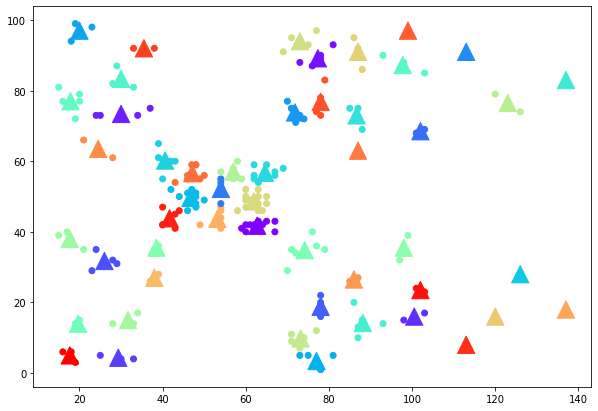

In [44]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c=np.unique(kmeans.labels_), cmap='rainbow',s=300,marker="^")
plt.show()

In [45]:
kmeans.inertia_

1888.9314935064945

In [46]:
from sklearn.cluster import KMeans

In [ ]:
kmeans=KMeans(n_clusters= 2)
kmeans.fit(X)

In [47]:
wcss=[]
for i in range(2,11):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

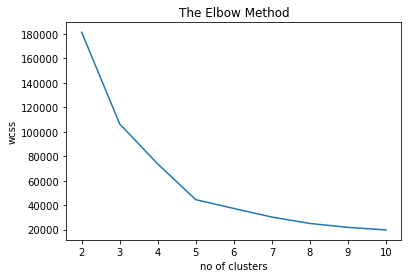

In [48]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(2,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [49]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

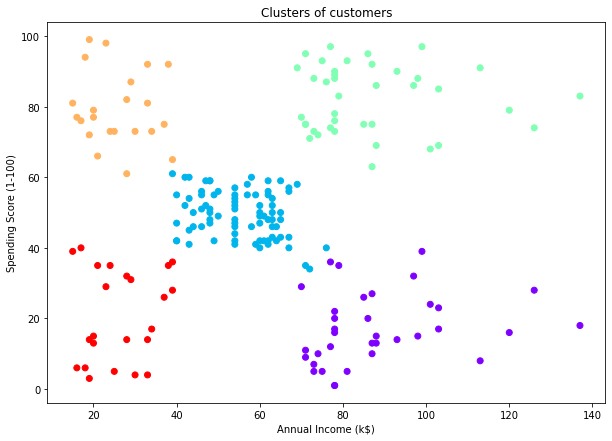

In [50]:
#Visualizing all the clusters 
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='rainbow')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Hierarchical Clustering

In [51]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [52]:
# setting distance_threshold=0 ensures we compute the full tree.
h_cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='ward')
h_cluster.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [53]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

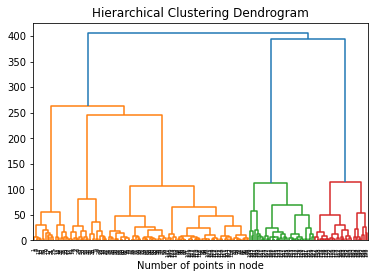

In [54]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(h_cluster, truncate_mode='level', p=20)
plt.xlabel("Number of points in node")
plt.show()

In [55]:
h_cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=5)
h_cluster.fit(X)

AgglomerativeClustering(n_clusters=5)

In [56]:
h_cluster.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

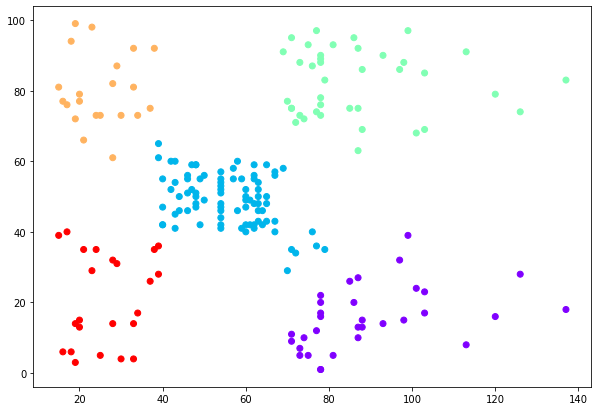

In [57]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=h_cluster.labels_, cmap='rainbow')